In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset California Housing
housing = fetch_california_housing()
data = housing.data
target = housing.target

In [3]:
# Mengubah dataset menjadi DataFrame untuk analisis lebih mudah (opsional)
data_df = pd.DataFrame(data, columns=housing.feature_names)
data_df['Target'] = target

In [4]:
# Tampilkan beberapa baris pertama dari dataset untuk memahami isinya
print("Dataset California Housing:")
data_df.head()

Dataset California Housing:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
# Preprocessing data - Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [8]:
# Bagi data menjadi train dan test (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)


In [9]:
# Setup TensorBoard untuk logging
tensorboard_callback = TensorBoard(log_dir="logs_housing", histogram_freq=1)

In [10]:
# Membuat model jaringan saraf tiruan
model = Sequential([
    Dense(64, activation='relu', input_shape=(data.shape[1],)),  # Input layer (8 fitur dari data housing)
    Dense(32, activation='relu'),                                # Hidden layer 1
    Dense(16, activation='relu'),                                # Hidden layer 2
    Dense(1)                                                     # Output layer (nilai prediksi harga rumah)
])

# Menampilkan ringkasan model
print("\nRingkasan Model Neural Network:")
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Ringkasan Model Neural Network:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile model
model.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error untuk regresi
              metrics=['mae'])  # Mean Absolute Error sebagai metrik tambahan


In [12]:
# Training model
print("\nTraining model...")
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[tensorboard_callback])


Training model...
Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.0917 - mae: 0.9918 - val_loss: 0.4567 - val_mae: 0.4804
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.4311 - mae: 0.4591 - val_loss: 0.3957 - val_mae: 0.4470
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3690 - mae: 0.4304 - val_loss: 0.3550 - val_mae: 0.4173
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3340 - mae: 0.4088 - val_loss: 0.3489 - val_mae: 0.4288
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3242 - mae: 0.4009 - val_loss: 0.3300 - val_mae: 0.3950
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3146 - mae: 0.3886 - val_loss: 0.3351 - val_mae: 0.4051
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3065 - mae: 0.3854 - val_loss: 0.3212 - val_mae: 0.3830
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2963 - mae: 0.3798 - val_loss: 0.3184 - val_mae: 0.3864
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━

In [13]:
# Evaluasi model
print("\nEvaluasi model:")
loss, mae = model.evaluate(x_test, y_test)
print(f"Loss (MSE): {loss}, Mean Absolute Error (MAE): {mae}")



Evaluasi model:
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2663 - mae: 0.3430
Loss (MSE): 0.27125123143196106, Mean Absolute Error (MAE): 0.34401509165763855


In [14]:
# Testing model - membuat prediksi menggunakan data uji
print("\nPrediksi hasil model dengan data uji:")
y_pred = model.predict(x_test)


Prediksi hasil model dengan data uji:
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
# Tampilkan beberapa hasil prediksi bersama dengan nilai aslinya
for i in range(10):
    print(f"Data asli: {y_test[i]:.2f}, Prediksi: {y_pred[i][0]:.2f}")

Data asli: 0.48, Prediksi: 0.55
Data asli: 0.46, Prediksi: 0.95
Data asli: 5.00, Prediksi: 4.77
Data asli: 2.19, Prediksi: 2.46
Data asli: 2.78, Prediksi: 2.51
Data asli: 1.59, Prediksi: 1.58
Data asli: 1.98, Prediksi: 2.33
Data asli: 1.57, Prediksi: 1.60
Data asli: 3.40, Prediksi: 2.25
Data asli: 4.47, Prediksi: 4.55


In [16]:
# Plotting Loss dan MAE selama training dan validasi
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

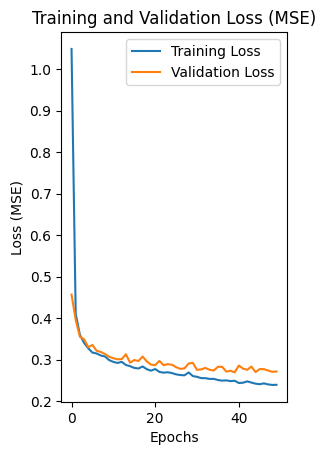

In [17]:
# Plot untuk Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

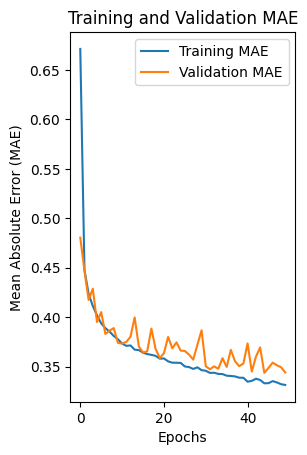

In [18]:
# Plot untuk Mean Absolute Error (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

In [19]:
# Tampilkan grafik
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [20]:
# Simpan model dalam format .h5
model.save('saved_model/housing_model.h5')
print("\nModel disimpan sebagai 'saved_model/housing_model.h5'.")


Model disimpan sebagai 'saved_model/housing_model.h5'.
